# Regressão Linear - Multiplas Variáveis

In [2]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Gerar Dataset

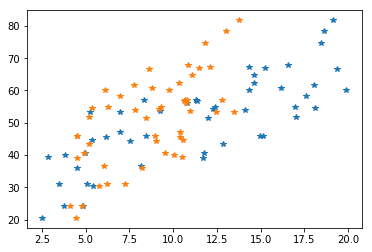

In [3]:
np.random.seed(101)

a = np.random.uniform(2, 20, 50)
b = np.random.uniform(4, 14, 50)

label = []
label = (2*a + 3*b + 2.2)

plt.plot(a, label, '*')
plt.plot(b, label, '*')

In [4]:
a_df = pd.DataFrame(data=a, columns=['A'])
b_df = pd.DataFrame(data=b, columns=['B'])
label_df = pd.DataFrame(data=label, columns=['LABEL'])

data = pd.concat([a_df, b_df], axis=1)
data.head()

,A,B
0,11.295175,10.806778
1,12.272017,9.215482
2,2.512536,4.433967
3,5.087390,6.239366
4,14.334986,9.752051


### Normalizando Dados

In [11]:
# data_norm = data.apply(lambda x: (x - x.min())/ (x.max() - x.min()) ).values
# label_norm = label_df.apply(lambda x: (x - x.min())/ (x.max() - x.min()) ).values
#nao irei normalizar os dados
data_norm = data.values
label_norm = label_df.values

## Gerar Grafo - TensorFlow

In [12]:
n = 2 #number of features

batch_size = 5
W = tf.Variable(tf.zeros([n, 1]))
bias = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [batch_size, n])
y = tf.placeholder(tf.float32, [batch_size, 1])

In [13]:
y_model = tf.matmul(x, W) + bias

In [14]:
cost = tf.reduce_sum(tf.square(y-y_model))

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

In [16]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10
    for steps in range(2000):
        for _ in range(batches):
            rand_ind = np.random.randint(len(label_norm), size=batch_size)
            feed = {x:data_norm[rand_ind], y:label_norm[rand_ind]}
            sess.run(train, feed_dict=feed)
        
    ma, mb = sess.run([W, bias])
    

In [24]:
print(ma, mb)

[[ 2.]
 [ 3.]] [ 2.20000148]


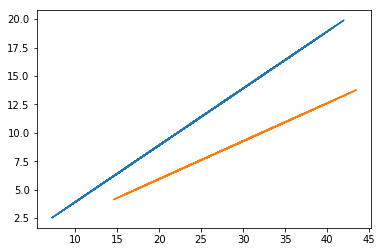

In [25]:
y_hat = np.array(ma).transpose()*np.array(data_norm) + mb
plt.plot(y_hat, data_norm)